In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as np

In [3]:
#read in the credit_cards.csv file
data = pd.read_csv("credit_cards.csv")

In [4]:
#show the first ten record in the dataset
data.head(10)

,Card Type Full Name,Issuing Bank,Card Number,Card Holder's Name,CVV2,Issue Date,Expiry Date,Billing Date,Card PIN,Credit Limit
0,Visa,Chase,4431465245886276,Frank Q Ortiz,362,09/2016,09/2034,7,1247,103700
1,Discover,Discover,6224764404044446,Tony E Martinez,35,06/2012,06/2030,23,6190,92900
2,Japan Credit Bureau,JCB,3541789329050940,Ana M Downs,945,03/2017,03/2021,10,8550,71500
3,American Express,American Express,371306399244328,Calvin T House,3868,09/2007,09/2018,26,1777,190500
4,Visa,Chase,4332985341176660,Gilda J Wade,237,12/2012,12/2023,26,5551,179700
5,Master Card,Chase,5405935391199277,Doris Giles,734,02/2010,02/2019,2,744,112000
6,Master Card,USAA,5359097928073131,Alvin M Espinoza,907,02/2011,02/2029,2,5000,80600
7,Master Card,Bank of America,5230327834921460,Christopher X Holcomb,357,01/2014,01/2024,19,4598,11000
8,Discover,Discover,6469129126918968,Liliana Goodman,888,11/2007,11/2012,28,3078,81000
9,Discover,Discover,6011199663449639,Kim M Lynn,762,12/2014,12/2020,2,2695,85800


In [5]:
#show a summary of the columns, their types, and the non null count of each
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Card Type Full Name  1000 non-null   object
 1   Issuing Bank         1000 non-null   object
 2   Card Number          1000 non-null   int64 
 3   Card Holder's Name   1000 non-null   object
 4   CVV2                 1000 non-null   int64 
 5   Issue Date           1000 non-null   object
 6   Expiry Date          1000 non-null   object
 7   Billing Date         1000 non-null   int64 
 8   Card PIN             1000 non-null   int64 
 9   Credit Limit         1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
#rename the 'Card Type Full Name' and 'Card Holder' Name columns
#to 'Type' and 'Client respectively
data.rename(columns={'Card Type Full Name': 'Type', 'Card Holder\'s Name': 'Client'}, inplace=True)

In [7]:
#show card type, bank, client, for all cases where credit limit > 70000
data[(data['Credit Limit'] >= 70000)][['Type', 'Issuing Bank', 'Client']]

,Type,Issuing Bank,Client
0,Visa,Chase,Frank Q Ortiz
1,Discover,Discover,Tony E Martinez
2,Japan Credit Bureau,JCB,Ana M Downs
3,American Express,American Express,Calvin T House
4,Visa,Chase,Gilda J Wade
...,...,...,...
995,Japan Credit Bureau,JCB,Theresa F King
996,Japan Credit Bureau,JCB,Terence D Mejia
997,Japan Credit Bureau,JCB,Yolanda Moore
998,Discover,Discover,Kurtis V Haney


In [8]:
#find all clients biling date, card number for clients of Chase Bank
data[(data['Issuing Bank'] == 'Chase')][['Client', 'Billing Date', 'Card Number']]

,Client,Billing Date,Card Number
0,Frank Q Ortiz,7,4431465245886276
4,Gilda J Wade,26,4332985341176660
5,Doris Giles,2,5405935391199277
12,Valentin G Doyle,16,5130409236105925
15,Robert B Mcintyre,10,5379481552433991
...,...,...,...
963,Debra P Cochran,17,4402799202123082
970,Alana Tanner,25,5462624880054520
980,Michel U Burke,21,4253648620957219
986,Magdalena Kidd,20,5356523903901791


In [9]:
#find all clients card number, credit limit for Visa with credit limit >100000
data[(data['Credit Limit'] >= 100000) & (data['Type'] == 'Visa')][['Card Number', 'Credit Limit']]

,Card Number,Credit Limit
0,4431465245886276,103700
4,4332985341176660,179700
18,4821146928941954,106900
21,4947220459670651,124000
29,4021927175265827,154200
...,...,...
956,4472372970427971,147700
978,4184597026254933,125900
984,4792292367755599,120300
985,4009846246856396,190800


In [10]:
#get all clients, issuing bank, credit limit of all those that a Master Card and expiry date is after 2020
data[(data['Type'] == 'Master Card') & (data['Expiry Date'].apply(lambda x: x[3:]) >= '2021')][['Client', 'Issuing Bank', 'Credit Limit']]

,Client,Issuing Bank,Credit Limit
6,Alvin M Espinoza,USAA,80600
7,Christopher X Holcomb,Bank of America,11000
13,Thomas L Stanton,Capital One,51800
15,Robert B Mcintyre,Chase,65900
20,Margery W Austin,Citibank,198800
...,...,...,...
944,Marcelino S Spencer,Capital One,84800
948,Neal A Everett,Bank of America,119000
955,Aaron X Coleman,Chase,175900
972,Federico X Chambers,Capital One,161200


In [11]:
#how many different card issuers are there?
data['Issuing Bank'].value_counts()

JCB                 168
Diners Club         164
Chase               133
Discover            130
American Express    104
Bank of America      69
Capital One          49
Citibank             49
USAA                 38
U.S. Bancorp         30
Wells Fargo          20
GE Capital           14
Barclays             14
PNC                  10
First National        4
Cabela�s WFB          4
Name: Issuing Bank, dtype: int64

Type
American Express             151
Diners Club International    164
Discover                     130
Japan Credit Bureau          168
Master Card                  198
Visa                         189
Name: Client, dtype: int64

<BarContainer object of 6 artists>

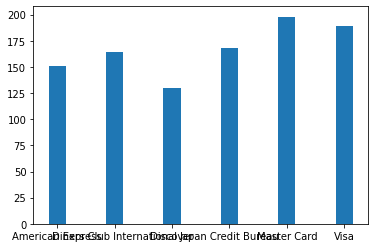

In [18]:
#plat a bar chart showing th number of customer for each card type

import matplotlib.pyplot as plt
client_data = data.groupby(['Type']).count()['Client']

fig, ax = plt.subplots()
ax.bar(client_data.index, client_data, 0.3)
